## Data Cleaning Techniques

In [ ]:
import pandas as pd

dataset = pd.read_csv('202104-divvy-tripdata.csv')
dataset.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual


In [ ]:
dataset.shape[0]

256439

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256439 entries, 0 to 256438
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             256439 non-null  object 
 1   rideable_type       256439 non-null  object 
 2   started_at          256439 non-null  object 
 3   ended_at            256439 non-null  object 
 4   start_station_name  231272 non-null  object 
 5   start_station_id    231272 non-null  object 
 6   end_station_name    229460 non-null  object 
 7   end_station_id      229460 non-null  object 
 8   start_lat           256439 non-null  float64
 9   start_lng           256439 non-null  float64
 10  end_lat             256199 non-null  float64
 11  end_lng             256198 non-null  float64
 12  member_casual       256438 non-null  object 
dtypes: float64(4), object(9)
memory usage: 25.4+ MB


In [ ]:
dataset.isnull()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
256434,False,False,False,False,False,False,False,False,False,False,False,False,False
256435,False,False,False,False,False,False,False,False,False,False,False,False,False
256436,False,False,False,False,False,False,False,False,False,False,False,False,False
256437,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.isnull().sum()

,0
ride_id,0
rideable_type,0
started_at,0
ended_at,0
start_station_name,25167
start_station_id,25167
end_station_name,26979
end_station_id,26979
start_lat,0
start_lng,0


In [ ]:
dataset.isnull().sum().sum()

104774

In [ ]:
dataset.isnull().sum()/dataset.shape[0]*100

,0
ride_id,0.000000
rideable_type,0.000000
started_at,0.000000
ended_at,0.000000
start_station_name,9.814030
start_station_id,9.814030
end_station_name,10.520631
end_station_id,10.520631
start_lat,0.000000
start_lng,0.000000


In [ ]:
dataset.isnull().sum().sum()/(dataset.shape[0]*dataset.shape[1])*100

3.142867684532564

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

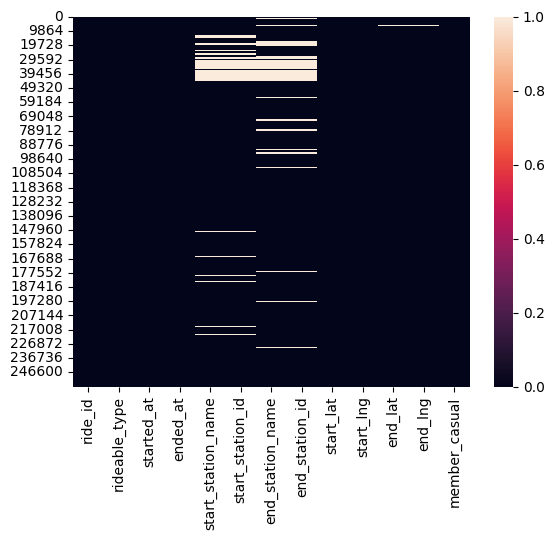

In [ ]:
sns.heatmap(dataset.isnull())
plt.show()

## Encoding (ordinal)

In [ ]:
dataset.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual


In [ ]:
dataset = dataset['rideable_type'].fillna('rideable_type').inplace=True


In [ ]:
dataset.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual


In [ ]:
endcoding_dataset = dataset[['rideable_type','member_casual']]
pd.get_dummies(endcoding_dataset)

,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,member_casual_casual,member_casual_member
0,True,False,False,False,True
1,False,True,False,True,False
2,False,True,False,True,False
3,True,False,False,False,True
4,False,True,False,True,False
...,...,...,...,...,...
256434,False,False,True,False,True
256435,True,False,False,True,False
256436,True,False,False,False,True
256437,True,False,False,False,True


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('rideable_type_classic_bike').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('rideable_type_docked_bike').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('rideable_type_electric_bike').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('member_casual_casual').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['rideable_type_docked_bike'].value_counts()
    for x_label, grp in _df_4.groupby('rideable_type_classic_bike')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('rideable_type_classic_bike')
_ = plt.ylabel('rideable_type_docked_bike')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['rideable_type_electric_bike'].value_counts()
    for x_label, grp in _df_5.groupby('rideable_type_docked_bike')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('rideable_type_docked_bike')
_ = plt.ylabel('rideable_type_electric_bike')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['member_casual_casual'].value_counts()
    for x_label, grp in _df_6.groupby('rideable_type_electric_bike')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('rideable_type_electric_bike')
_ = plt.ylabel('member_casual_casual')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['member_casual_member'].value_counts()
    for x_label, grp in _df_7.groupby('member_casual_casual')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('member_casual_casual')
_ = plt.ylabel('member_casual_member')

In [ ]:
pd.get_dummies(endcoding_dataset).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256439 entries, 0 to 256438
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   rideable_type_classic_bike   256439 non-null  bool 
 1   rideable_type_docked_bike    256439 non-null  bool 
 2   rideable_type_electric_bike  256439 non-null  bool 
 3   member_casual_casual         256439 non-null  bool 
 4   member_casual_member         256439 non-null  bool 
dtypes: bool(5)
memory usage: 1.2 MB


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoding = OneHotEncoder()
encoding.fit_transform(endcoding_dataset)

<256439x6 sparse matrix of type '<class 'numpy.float64'>'
	with 512878 stored elements in Compressed Sparse Row format>

In [ ]:
arr = encoding.fit_transform(endcoding_dataset).toarray()
arr

array([[1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.]])

In [ ]:
pd.DataFrame(arr, columns=['rideable_type_classic_bike', 'rideable_type_docked_bike', 'rideable_type_electric_bike', 'member_casual_member', 'member_casual_casual', 'extra_column'])


,rideable_type_classic_bike,rideable_type_docked_bike,rideable_type_electric_bike,member_casual_member,member_casual_casual,extra_column
0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
256434,0.0,0.0,1.0,0.0,1.0,0.0
256435,1.0,0.0,0.0,1.0,0.0,0.0
256436,1.0,0.0,0.0,0.0,1.0,0.0
256437,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
encoding = OneHotEncoder(drop='first')
encoding.fit_transform(endcoding_dataset)

<256439x4 sparse matrix of type '<class 'numpy.float64'>'
	with 250596 stored elements in Compressed Sparse Row format>

In [ ]:
arr = encoding.fit_transform(endcoding_dataset).toarray()
arr

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 1.]])

In [ ]:
pd.DataFrame(arr, columns=['rideable_type_docked_bike', 'rideable_type_electric_bike', 'member_casual_casual', 'extra_column'])


,rideable_type_docked_bike,rideable_type_electric_bike,member_casual_casual,extra_column
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
256434,0.0,1.0,1.0,0.0
256435,0.0,0.0,0.0,0.0
256436,0.0,0.0,1.0,0.0
256437,0.0,0.0,1.0,0.0


##  Encoding (label)

In [ ]:
data = pd.DataFrame({"name":["learning","cat","dog","fish","horse"]})
data

,name
0,learning
1,cat
2,dog
3,fish
4,horse


In [ ]:
# encoding
from sklearn.preprocessing import LabelEncoder
label_encoding= LabelEncoder()
label_encoding.fit_transform(data['name'])


array([4, 0, 1, 2, 3])

In [ ]:
data['name_label']= label_encoding.fit_transform(data['name'])
data

,name,name_label
0,learning,4
1,cat,0
2,dog,1
3,fish,2
4,horse,3


## Outlier

In [ ]:
dataset.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual


In [ ]:
dataset.describe()

,start_lat,start_lng,end_lat,end_lng
count,256439.000000,256439.000000,256199.000000,256198.000000
mean,41.899861,-87.644685,41.900222,-87.644969
std,0.048007,0.027572,0.048016,0.027710
min,41.640000,-87.780000,41.590000,-87.850000
25%,41.880958,-87.659172,41.880958,-87.660000
50%,41.895654,-87.641066,41.896750,-87.641170
75%,41.928773,-87.626622,41.928830,-87.626761
max,42.070000,-87.520000,42.150000,-87.520000


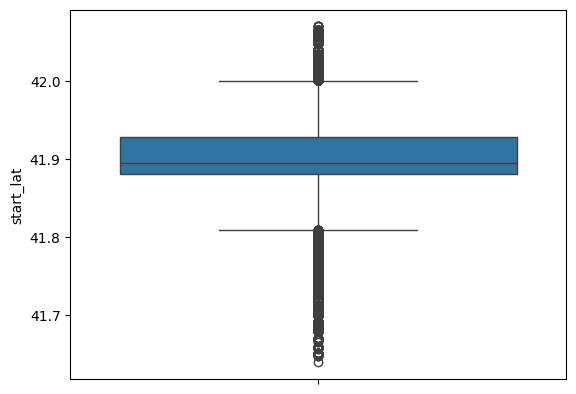

In [ ]:
sns.boxplot(dataset['start_lat'])
plt.show()

<ipython-input-61-5cf70e1f00b5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['start_lat'])


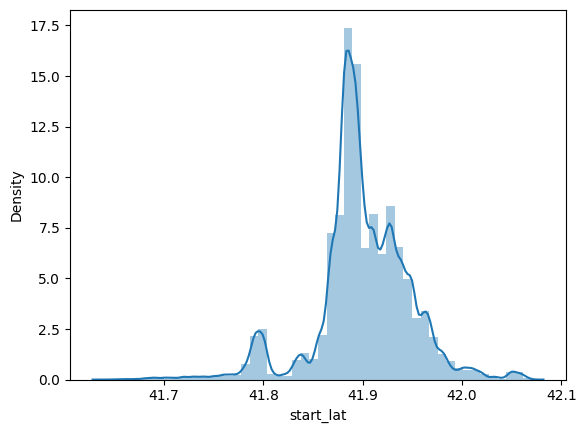

In [ ]:
sns.distplot(dataset['start_lat'])
plt.show()

In [ ]:
dataset.shape

(256439, 13)

In [ ]:
q1 = dataset['start_lat'].quantile(0.25)
q3 = dataset['start_lat'].quantile(0.75)
iqr = q3-q1


In [ ]:
min_range = q1-1.5*iqr
max_range = q3+1.5*iqr
min_range, max_range

(41.8092355, 42.0004955)

In [ ]:
new = dataset[dataset['start_lat']<=min_range]
new.shape

(16088, 13)

In [ ]:
new.describe()

,start_lat,start_lng,end_lat,end_lng
count,16088.000000,16088.000000,16042.000000,16042.000000
mean,41.780173,-87.598310,41.786469,-87.600892
std,0.029702,0.024038,0.039013,0.024798
min,41.640000,-87.740000,41.590000,-87.740000
25%,41.780000,-87.601334,41.780000,-87.606755
50%,41.791478,-87.594781,41.791478,-87.599861
75%,41.799494,-87.586464,41.800000,-87.587239
max,41.808915,-87.520000,42.050519,-87.520000


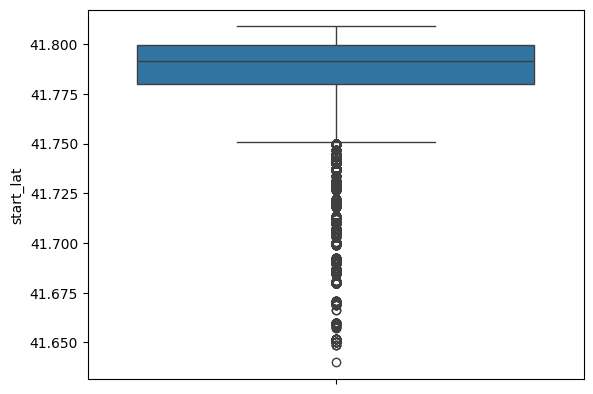

In [ ]:
sns.boxplot(new['start_lat'])
plt.show()